## Arbol de Decision winequality-red

## Jose Luis Portilla Martinez
ING. DE SISTEMAS UNAD 2024

In [121]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statistics import mean, median
from scipy import stats
import math
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('darkgrid')

from sklearn.preprocessing import LabelEncoder, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, roc_auc_score, accuracy_score, classification_report
from imblearn.over_sampling import RandomOverSampler, SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

## Análisis Exploratorio

In [3]:
df = pd.read_csv('winequality-red.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
df.isnull().any()

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


## Análisis univariante

C:\Users\JOSE LUIS\AppData\Local\Temp\ipykernel_15864\3011199643.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])
C:\Users\JOSE LUIS\AppData\Local\Temp\ipykernel_15864\3011199643.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])
C:\Users\JOSE LUIS\AppData\Local\Temp\ipyker

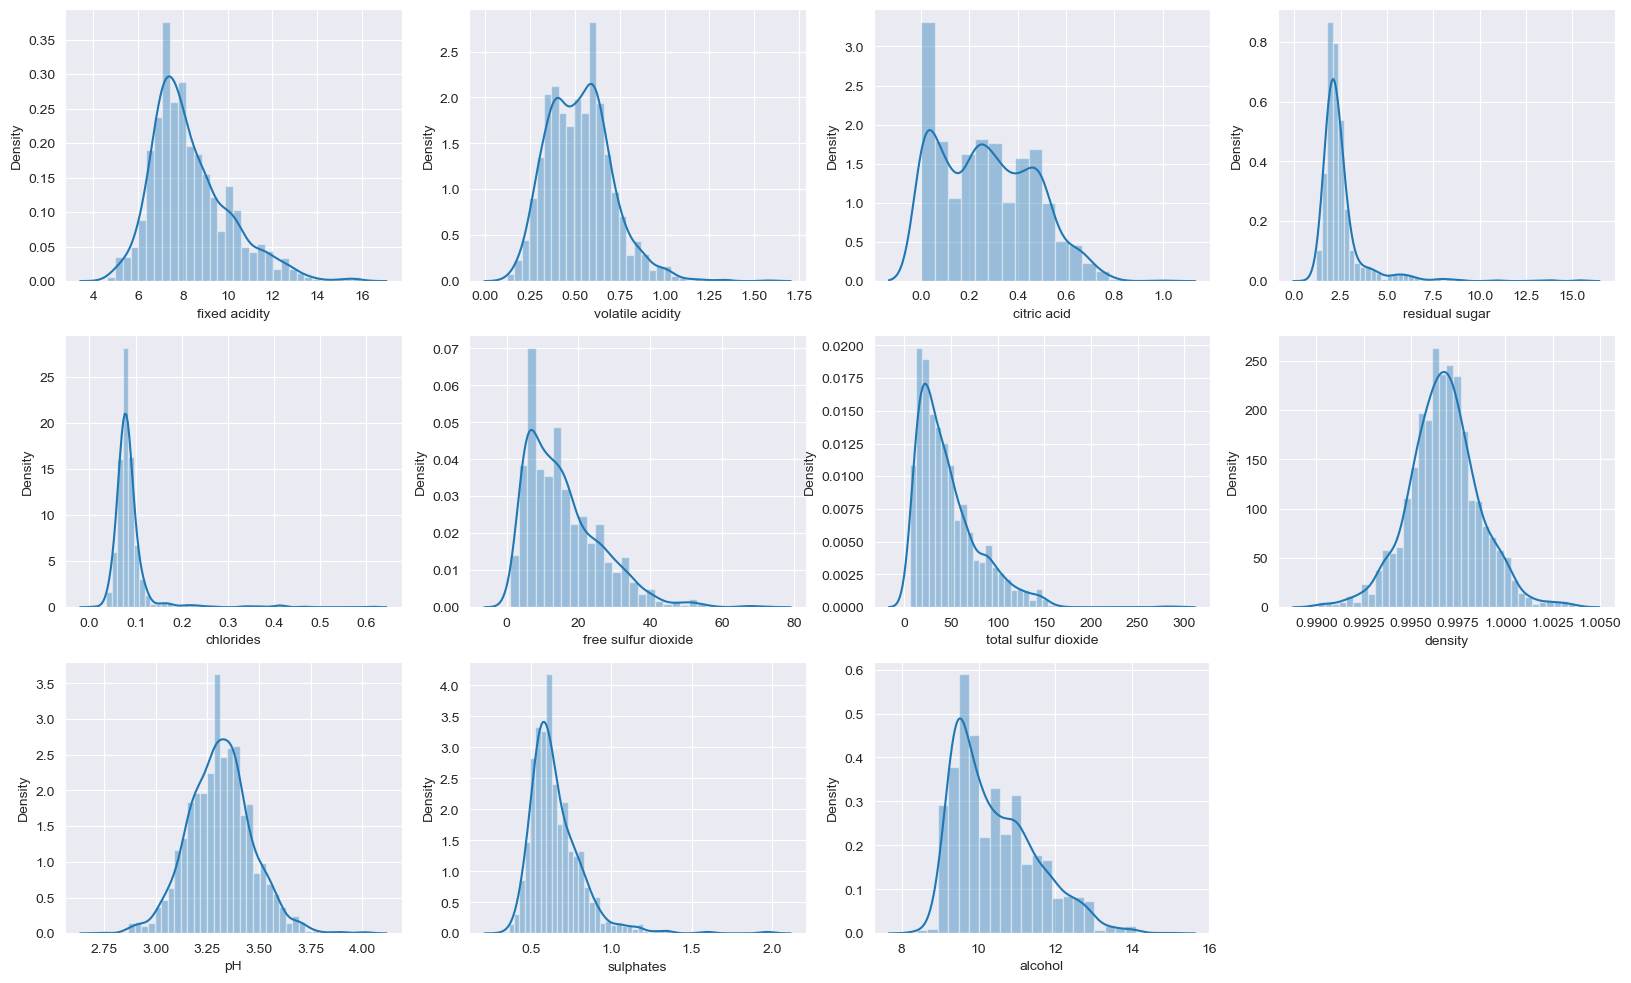

In [6]:
fig = plt.figure(figsize=(20,12))

cols = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']

count = 1

for col in cols:
    fig.add_subplot(3,4,count)
    sns.distplot(df[col])

    count += 1

plt.show()

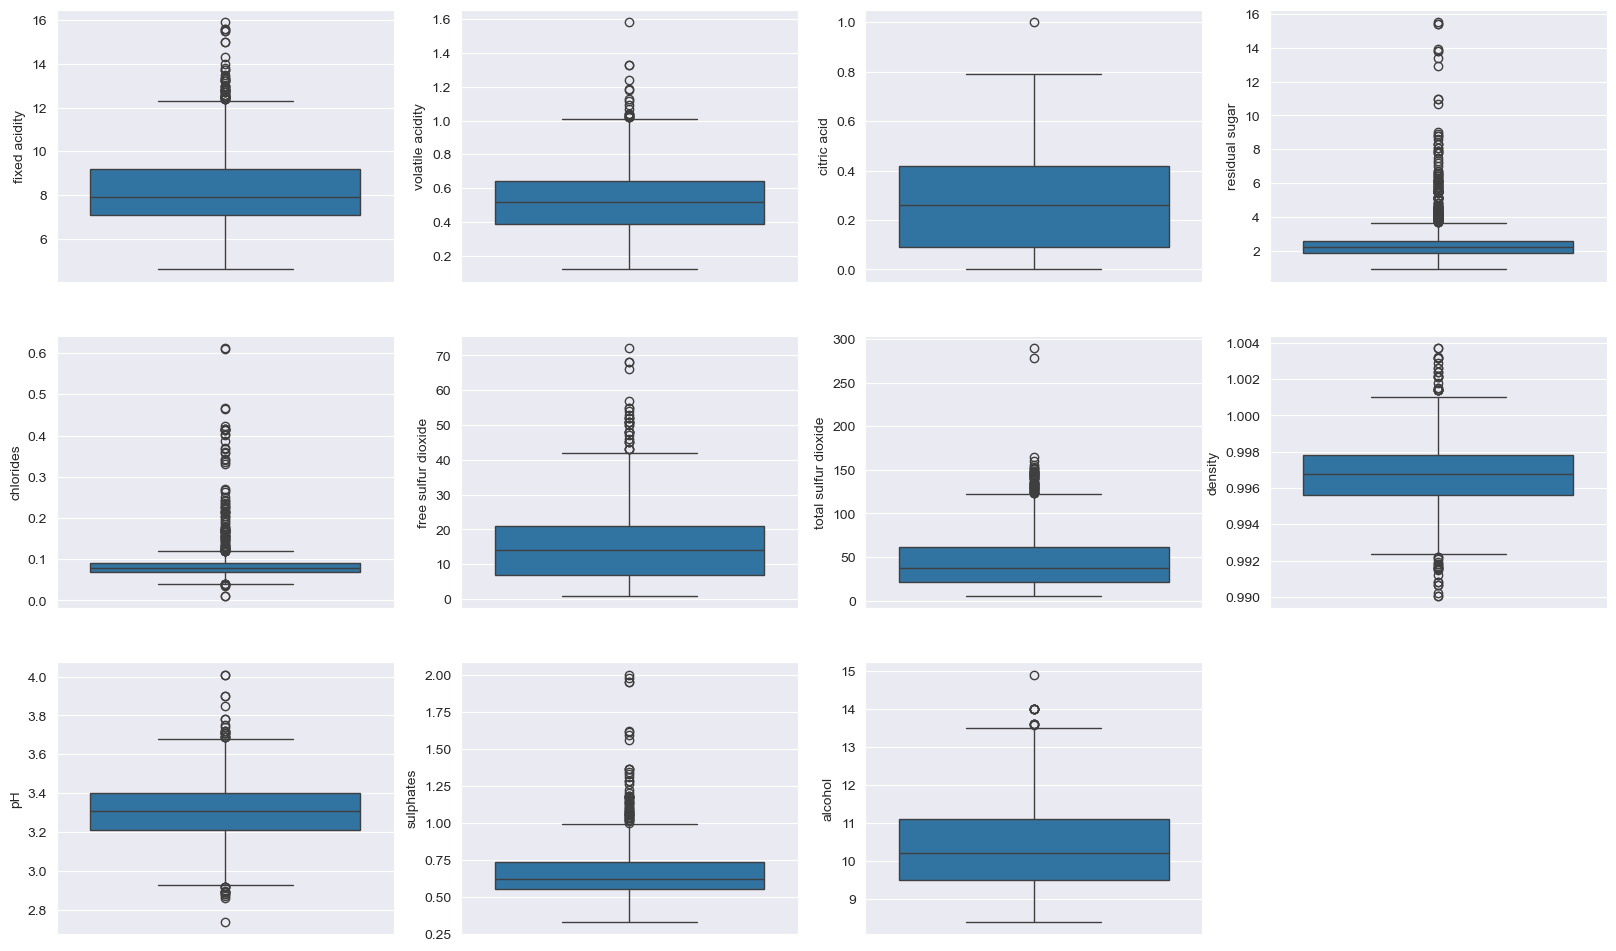

In [7]:
fig = plt.figure(figsize=(20,12))

cols = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']

count = 1

for col in cols:
    fig.add_subplot(3,4,count)
    sns.boxplot(df[col])

    count += 1

plt.show()

Vamos a observar más de cerca algunos valores extremos:

In [8]:
df.loc[df['citric acid'] == df['citric acid'].max()]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
151,9.2,0.52,1.0,3.4,0.61,32.0,69.0,0.9996,2.74,2.0,9.4,4


In [9]:
df.loc[df['residual sugar'] == df['residual sugar'].max()]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
480,10.6,0.28,0.39,15.5,0.069,6.0,23.0,1.0026,3.12,0.66,9.2,5


In [10]:
df.nlargest(2, 'total sulfur dioxide')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1081,7.9,0.3,0.68,8.3,0.05,37.5,289.0,0.99316,3.01,0.51,12.3,7
1079,7.9,0.3,0.68,8.3,0.05,37.5,278.0,0.99316,3.01,0.51,12.3,7


In [11]:
df.nlargest(2, 'sulphates')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
151,9.2,0.52,1.00,3.4,0.61,32.0,69.0,0.9996,2.74,2.00,9.4,4
92,8.6,0.49,0.29,2.0,0.11,19.0,133.0,0.9972,2.93,1.98,9.8,5


In [12]:
df.loc[df['pH'] == df['pH'].max()]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1316,5.4,0.74,0.0,1.2,0.041,16.0,46.0,0.99258,4.01,0.59,12.5,6
1321,5.0,0.74,0.0,1.2,0.041,16.0,46.0,0.99258,4.01,0.59,12.5,6


In [13]:
df.loc[df['alcohol'] == df['alcohol'].max()]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
652,15.9,0.36,0.65,7.5,0.096,22.0,71.0,0.9976,2.98,0.84,14.9,5


In [14]:
df.loc[df['chlorides'] == df['chlorides'].max()]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
258,7.7,0.41,0.76,1.8,0.611,8.0,45.0,0.9968,3.06,1.26,9.4,5


Por lo general, los vinos con valores extremos (outliers) tienden a una calidad mediocre. Vamos a ver cómo se distribuye la calidad:

C:\Users\JOSE LUIS\AppData\Local\Temp\ipykernel_15864\3987340949.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['quality'], kde=False)


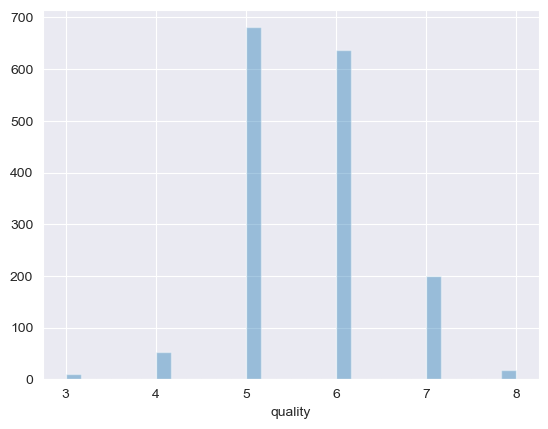

In [15]:
sns.distplot(df['quality'], kde=False)
plt.show()

In [16]:
df.quality.unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

Otra forma de ver cómo se distribuye la calidad es con la función de distribución acumulada (CDF). Observamos que los vinos con una calidad de 6 o menos suponen prácticamente el 90 % de nuestra muestra. Solo en el 10 % restante aproximadamente, se encuentran los vinos de mayor calidad.

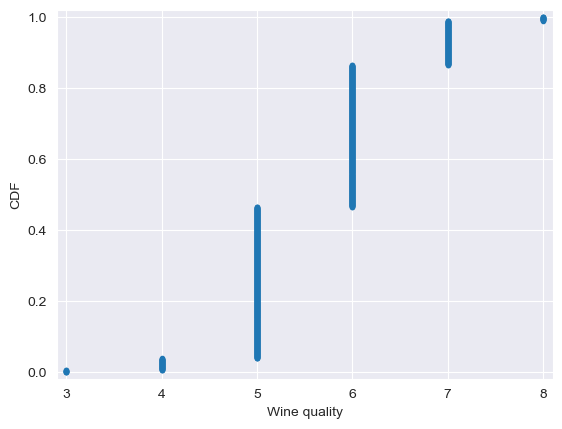

In [17]:
x = np.sort(df['quality'])
y = np.arange(1, len(x)+1) / len(x)

plt.plot(x, y, marker='.', linestyle='none')
plt.xlabel('Wine quality')
plt.ylabel('CDF')
plt.margins(0.02)

plt.show()

Veamos la estadística descriptiva de nuestras variables:

In [18]:
df.describe(include='all')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


El dióxido de azufre es un conservante del vino que se añade desde hace siglos. Dado que puede tener efectos adversos sobre la salud y sobre las propiedades del propio vino, existe una regulación acerca del mismo. En Europa las cantidades están más ajustadas, mientras que en EE.UU. podemos encontrar concentraciones por encima de 300.
Llaman la atención los valores extremos para esta variable, pero tienen esta explicación y no parecen ser errores de registro.

## Análisis multivariante - relaciones entre variables

In [19]:
# Comento para ahorrar espacio de archivo con la generación de este gráfico
#g = sns.PairGrid(df)
#g.map(plt.scatter)
#plt.show()

In [20]:
#pearson_corr = df.corr(method='pearson')
#pearson_corr

In [21]:
spearman_corr = df.corr(method='spearman')
spearman_corr

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.278282,0.661708,0.220701,0.250904,-0.175137,-0.088417,0.623071,-0.706674,0.212654,-0.066576,0.114084
volatile acidity,-0.278282,1.000000,-0.610259,0.032386,0.158770,0.021163,0.094110,0.025014,0.233572,-0.325584,-0.224932,-0.380647
citric acid,0.661708,-0.610259,1.000000,0.176417,0.112577,-0.076452,0.009400,0.352285,-0.548026,0.331074,0.096456,0.213481
residual sugar,0.220701,0.032386,0.176417,1.000000,0.212959,0.074618,0.145375,0.422266,-0.089971,0.038332,0.116548,0.032048
chlorides,0.250904,0.158770,0.112577,0.212959,1.000000,0.000805,0.130033,0.411390,-0.234361,0.020825,-0.284504,-0.189922
free sulfur dioxide,-0.175137,0.021163,-0.076452,0.074618,0.000805,1.000000,0.789698,-0.041178,0.115679,0.045862,-0.081367,-0.056901
total sulfur dioxide,-0.088417,0.094110,0.009400,0.145375,0.130033,0.789698,1.000000,0.129332,-0.009841,-0.000504,-0.257806,-0.196735
density,0.623071,0.025014,0.352285,0.422266,0.411390,-0.041178,0.129332,1.000000,-0.312055,0.161478,-0.462445,-0.177074
pH,-0.706674,0.233572,-0.548026,-0.089971,-0.234361,0.115679,-0.009841,-0.312055,1.000000,-0.080306,0.179932,-0.043672
sulphates,0.212654,-0.325584,0.331074,0.038332,0.020825,0.045862,-0.000504,0.161478,-0.080306,1.000000,0.207330,0.377060


Usaremos el siguiente mapa de calor para tener una representación más clara:

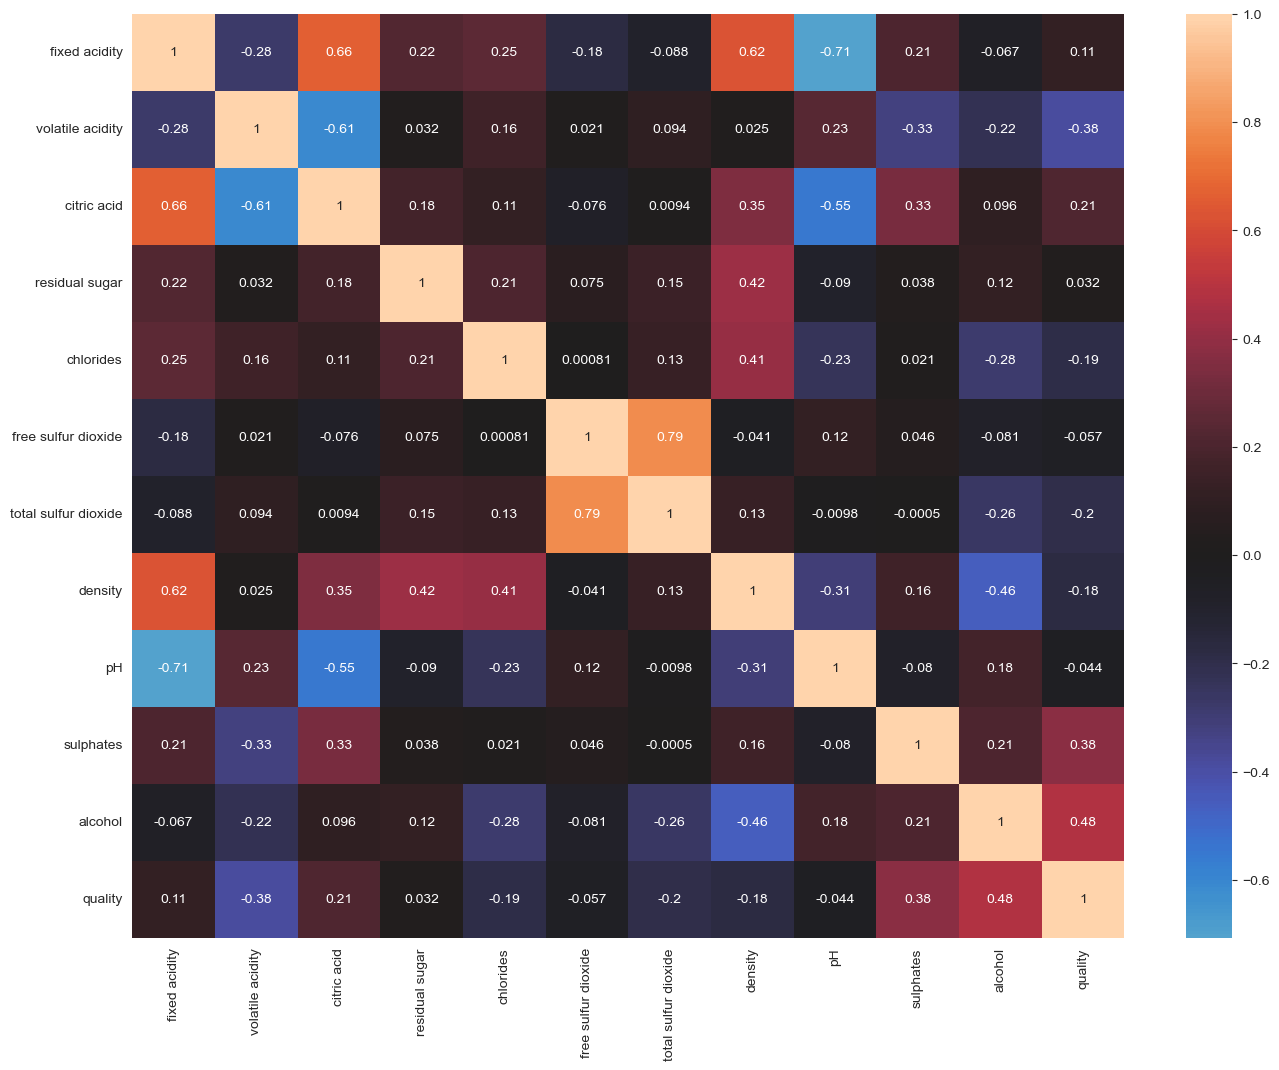

In [22]:
plt.figure(figsize=(16,12))
sns.heatmap(spearman_corr, xticklabels=spearman_corr.columns, yticklabels=spearman_corr.columns, center=0, annot=True)

plt.show()

Vamos a categorizar la calidad en distintos niveles y a estudiar un poco más de cerca algunas de las variables con las que se correlaciona más.

In [23]:
bins = [0, 4, 7, 10]
labels = ['bad', 'normal', 'good']
df['quality'] = pd.cut(df['quality'], bins=bins, labels=labels)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,normal
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,normal
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,normal
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,normal
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,normal


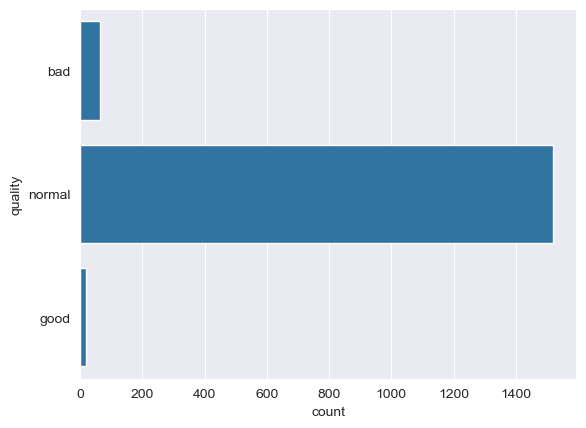

In [24]:
sns.countplot(df['quality'])
plt.show()

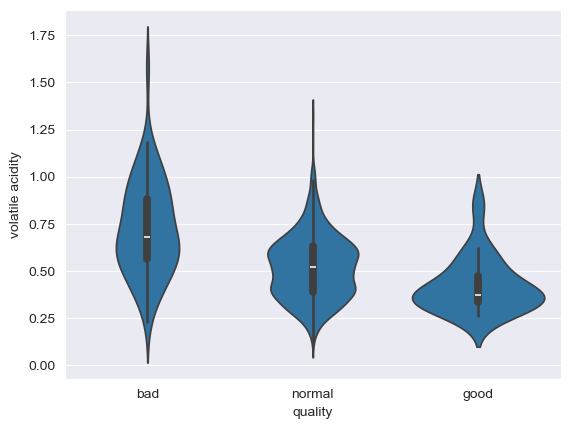

In [25]:
sns.violinplot(x=df['quality'], y=df['volatile acidity'])
plt.show()

La acidez volátil se pretende que sea lo más baja posible porque afecta al sabor. Es un conservante del vino. Vemos que los vinos de alta calidad tienden a tener una acidez volátil más baja.

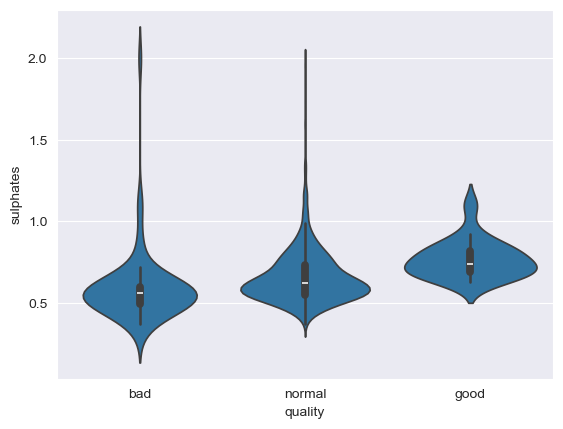

In [26]:
sns.violinplot(x=df['quality'], y=df['sulphates'])
plt.show()

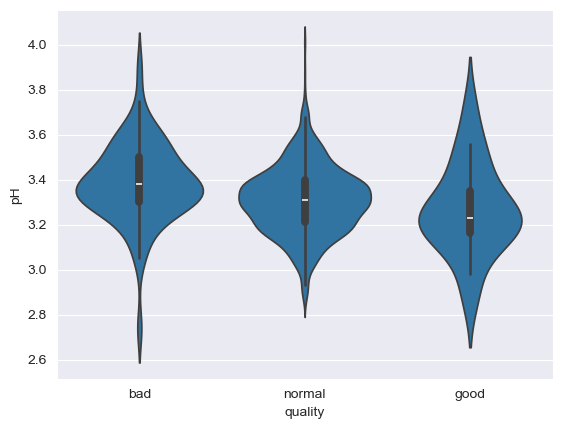

In [27]:
sns.violinplot(x=df['quality'], y=df['pH'])
plt.show()

Vemos cómo los vinos de alta calidad tienden ligeramente a tener un pH más ácido (en torno a 3,2) sin llegar a ser extremadamente ácidos (2,6) o muy planos (4).

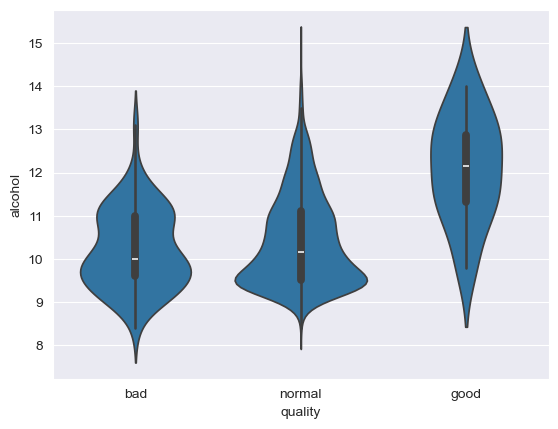

In [28]:
sns.violinplot(x=df['quality'], y=df['alcohol'])
plt.show()

Según los expertos, el grado de alcohol no es un condicionante de la calidad. Sin embargo, en esta ocasión vemos que los vinos de alta calidad tienden a tener un grado de alcohol mayor, pero están distribuidos en un rango aproximado de entre 8,5º y 15,5º.

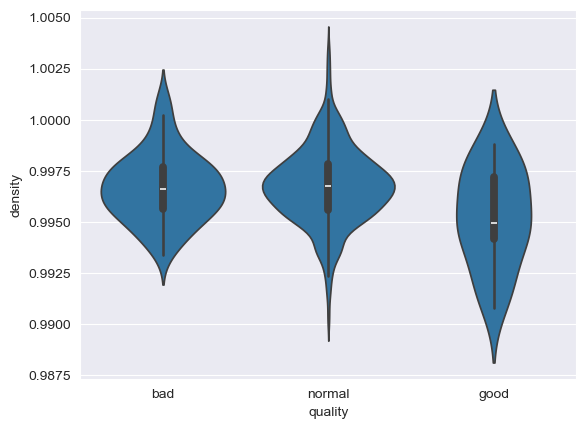

In [29]:
sns.violinplot(x=df['quality'], y=df['density'])
plt.show()

## Contraste de hipótesis

En este caso vamos a testear si la diferencia de medias de grados de alcohol entre el grupo de vinos de mala calidad y de buena calidad es significativa.

H0: media alcohol vinos malos = media alcohol vinos buenos, H1: media alcohol vinos malos NO es igual que la media alcohol vinos buenos

In [30]:
bad_wines = df[df['quality'] == 'bad']
good_wines = df[df['quality'] == 'good']

In [31]:
print('La media de alcohol de vinos de baja calidad es de:', bad_wines['alcohol'].mean())
print('El tamaño de la muestra es de:', len(bad_wines))
print('La varianza de la muestra es:', bad_wines['alcohol'].var())

print('La media de alcohol de vinos de alta calidad es de:', good_wines['alcohol'].mean())
print('El tamaño de la muestra es de:', len(good_wines))
print('La varianza de la muestra es:', good_wines['alcohol'].var())

La media de alcohol de vinos de baja calidad es de: 10.215873015873019
El tamaño de la muestra es de: 63
La varianza de la muestra es: 0.8430504352278549
La media de alcohol de vinos de alta calidad es de: 12.094444444444445
El tamaño de la muestra es de: 18
La varianza de la muestra es: 1.4982026143790848


C:\Users\JOSE LUIS\AppData\Local\Temp\ipykernel_15864\2448140307.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(bad_wines['alcohol'])
C:\Users\JOSE LUIS\AppData\Local\Temp\ipykernel_15864\2448140307.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(good_wines['alcohol'])


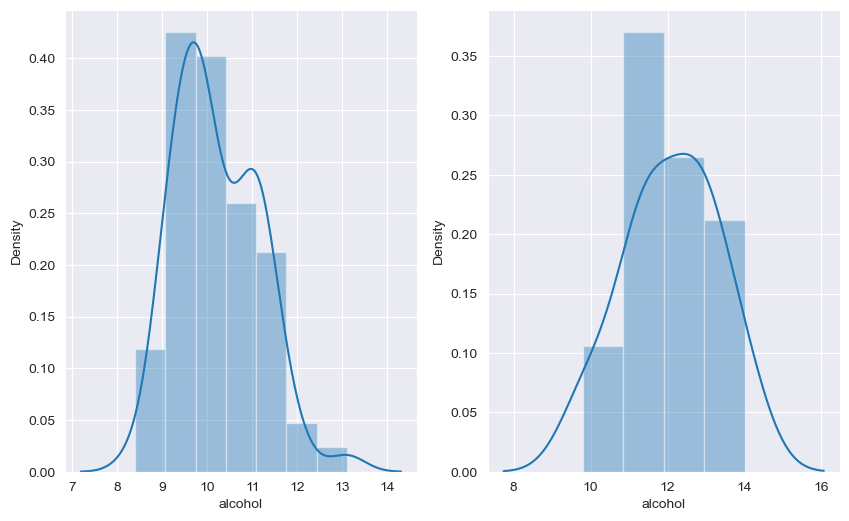

In [32]:
fig = plt.figure(figsize=(10,6))

fig.add_subplot(121)
sns.distplot(bad_wines['alcohol'])

fig.add_subplot(122)
sns.distplot(good_wines['alcohol'])

plt.show()

In [33]:
stats.ttest_ind(bad_wines['alcohol'], good_wines['alcohol'], equal_var=False)

TtestResult(statistic=-6.043728039271945, pvalue=3.828280408239352e-06, df=22.744524630239574)

In [34]:
se = math.sqrt((bad_wines['alcohol'].var() / len(bad_wines)) + (good_wines['alcohol'].var() / len(good_wines)))
print('El error estándar de la diferencia de medias entre los dos grupos es de:', se)

El error estándar de la diferencia de medias entre los dos grupos es de: 0.3108299076934852


## Modelo de predicción de la calidad del vino

## Árbol de Decisión

In [35]:
y = df['quality']

X = df.drop('quality', axis=1)

In [36]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=.33)

In [37]:
dtc = DecisionTreeClassifier(max_leaf_nodes=20, random_state=1)

In [38]:
dtc.fit(X_train, y_train)

DecisionTreeClassifier(max_leaf_nodes=20, random_state=1)

In [39]:
dt_pred = dtc.predict(X_valid)

In [40]:
print('Algunas predicciones son:', list(dt_pred[:5]))
print('Comparadas con el objetivo:', list(y_valid[:5]))

Algunas predicciones son: ['normal', 'normal', 'normal', 'normal', 'normal']
Comparadas con el objetivo: ['bad', 'normal', 'normal', 'normal', 'good']


In [41]:
confusion_matrix(y_valid, dt_pred)

array([[  1,   0,  22],
       [  0,   0,   9],
       [  5,   0, 491]], dtype=int64)

In [42]:
accuracy_score(y_valid, dt_pred)

0.9318181818181818

In [43]:
dt_report = classification_report(y_valid, dt_pred, output_dict=True)

df_dt_report = pd.DataFrame(dt_report).transpose()
df_dt_report

C:\Users\JOSE LUIS\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\JOSE LUIS\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\JOSE LUIS\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


,precision,recall,f1-score,support
bad,0.166667,0.043478,0.068966,23.000000
good,0.000000,0.000000,0.000000,9.000000
normal,0.940613,0.989919,0.964637,496.000000
accuracy,0.931818,0.931818,0.931818,0.931818
macro avg,0.369093,0.344466,0.344534,528.000000
weighted avg,0.890866,0.931818,0.909178,528.000000


Vemos que el "accuracy" es de más del 90 %. Buen resultado a primera vista. Sin embargo, viendo el resumen y la matriz de confusión, nos daremos cuenta de que el modelo no es capaz de reconocer los vinos clasificados como "buenos" o "malos" casi nunca.

## Random Forest


In [48]:
rf = RandomForestClassifier(n_estimators=100)

In [49]:
rf.fit(X_train, y_train)

RandomForestClassifier()

In [50]:
rf_pred = rf.predict(X_valid)

In [51]:
confusion_matrix(y_valid, rf_pred)

array([[  1,   0,  22],
       [  0,   1,   8],
       [  0,   0, 496]], dtype=int64)

In [52]:
accuracy_score(y_valid, rf_pred)

0.9431818181818182

In [53]:
rf_report = classification_report(y_valid, rf_pred, output_dict=True)

df_rf_report = pd.DataFrame(rf_report).transpose()
df_rf_report

,precision,recall,f1-score,support
bad,1.000000,0.043478,0.083333,23.000000
good,1.000000,0.111111,0.200000,9.000000
normal,0.942966,1.000000,0.970646,496.000000
accuracy,0.943182,0.943182,0.943182,0.943182
macro avg,0.980989,0.384863,0.417993,528.000000
weighted avg,0.946422,0.943182,0.918858,528.000000


En principio vemos que el Random Forest se desempeñará mejor en la tarea que estamos intentando resolver: ser capaces de predecir la calidad del vino. Para intentar mejorar este modelo, llevaremos a cabo una serie de transformaciones mientras jugamos con parámetros e ingeniería de variables.

Para empezar, dado que existen numerosos valores extremos en nuestro conjunto de datos, usaremos un normalizador robusto para ver qué ocurre con el modelo.

In [54]:
scaler = RobustScaler()

X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)

In [55]:
rf.fit(X_train, y_train)

rf_pred = rf.predict(X_valid)

In [56]:
confusion_matrix(y_valid, rf_pred)

array([[  1,   0,  22],
       [  0,   1,   8],
       [  0,   0, 496]], dtype=int64)

In [57]:
rf_report = classification_report(y_valid, rf_pred, output_dict=True)

df_rf_report = pd.DataFrame(rf_report).transpose()
df_rf_report

,precision,recall,f1-score,support
bad,1.000000,0.043478,0.083333,23.000000
good,1.000000,0.111111,0.200000,9.000000
normal,0.942966,1.000000,0.970646,496.000000
accuracy,0.943182,0.943182,0.943182,0.943182
macro avg,0.980989,0.384863,0.417993,528.000000
weighted avg,0.946422,0.943182,0.918858,528.000000


No vemos mejoría o, al menos, no es significativa.

A continuación, voy a crear más categorías dentro de calidad, para intentar que el conjunto de datos quede más equilibrado y los modelos puedan predecir mejor una u otra categoría. Otra opción sería realizar un sobremuestreo (oversampling).

## Recategorizando


In [59]:
df2 = pd.read_csv('winequality-red.csv')

In [60]:
bins = [0, 4, 5, 6, 10]
labels = ['bad', 'normal', 'good', 'very good']
df2['quality'] = pd.cut(df2['quality'], bins=bins, labels=labels)
df2.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,normal
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,normal
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,normal
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,good
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,normal


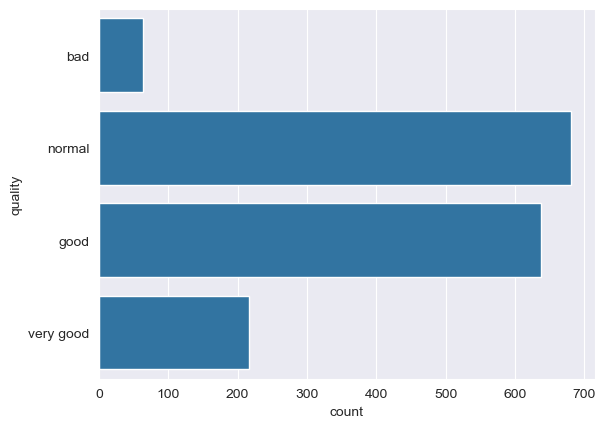

In [61]:
sns.countplot(df2['quality'])
plt.show()

Vemos que sigue habiendo, como ya esperábamos, grandes diferencias entre categorías.

Crearemos el modelo de predicción de nuevo y, si no conseguimos buena precisión, podemos pasar a hacer ingeniería de variables o sobremuestreo.

In [62]:
y = df2['quality']
X = df2.drop('quality', axis=1)

In [63]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=.33)

In [64]:
rf2 = RandomForestClassifier()

rf2.fit(X_train, y_train)

rf2_pred = rf2.predict(X_valid)

In [65]:
confusion_matrix(y_valid, rf2_pred)

array([[  0,   6,  14,   0],
       [  0, 156,  46,  15],
       [  1,  51, 163,   4],
       [  0,  32,   4,  36]], dtype=int64)

In [66]:
rf2_report = classification_report(y_valid, rf2_pred, output_dict=True)

df_rf2_report = pd.DataFrame(rf2_report).transpose()
df_rf2_report

,precision,recall,f1-score,support
bad,0.000000,0.000000,0.000000,20.000000
good,0.636735,0.718894,0.675325,217.000000
normal,0.718062,0.744292,0.730942,219.000000
very good,0.654545,0.500000,0.566929,72.000000
accuracy,0.672348,0.672348,0.672348,0.672348
macro avg,0.502335,0.490797,0.493299,528.000000
weighted avg,0.648777,0.672348,0.658031,528.000000


Después de crear nuevas categorías, vemos que las métricas de precisión mejoran y el F1 también. Sin embargo, el modelo sigue sin ver el patrón para vinos de categoría mala.

## Ingeniería de variables 

Las variables que más se correlacionan con la calidad son la acidez volátil, los sulfatos y el alcohol.

Vamos a generar una nueva variable a partir del alcohol, por ejemplo, para ayudar al modelo a discriminar entre categorías.

In [67]:
df2['alcohol squared'] = df2['alcohol'] ** 2

In [68]:
y = df2['quality']
X = df2.drop('quality', axis=1)

In [69]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=.33)

In [70]:
rf2.fit(X_train, y_train)

rf2_pred = rf2.predict(X_valid)

In [71]:
confusion_matrix(y_valid, rf2_pred)

array([[  0,   7,  20,   0],
       [  1, 159,  36,  14],
       [  2,  46, 169,   3],
       [  0,  32,   3,  36]], dtype=int64)

In [72]:
rf2_report = classification_report(y_valid, rf2_pred, output_dict=True)

df_rf2_report = pd.DataFrame(rf2_report).transpose()
df_rf2_report

,precision,recall,f1-score,support
bad,0.000000,0.000000,0.000000,27.000000
good,0.651639,0.757143,0.700441,210.000000
normal,0.741228,0.768182,0.754464,220.000000
very good,0.679245,0.507042,0.580645,71.000000
accuracy,0.689394,0.689394,0.689394,0.689394
macro avg,0.518028,0.508092,0.508887,528.000000
weighted avg,0.659358,0.689394,0.671024,528.000000


## Re-sampling

In [73]:
df3 = df2.copy()

In [74]:
df3.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'alcohol squared'],
      dtype='object')

In [75]:
y = df3['quality']
X = df3.drop('quality', axis=1)

In [76]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=.33)

Dado que el tamaño de la muestra que cae en cada categoría está desequilibrado, vamos a usar técnicas de sobremuestreo (oversampling).

Empezamos realizando la técnica de oversampling más sencilla con el siguiente algoritmo:

In [77]:
ros = RandomOverSampler(random_state=0)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

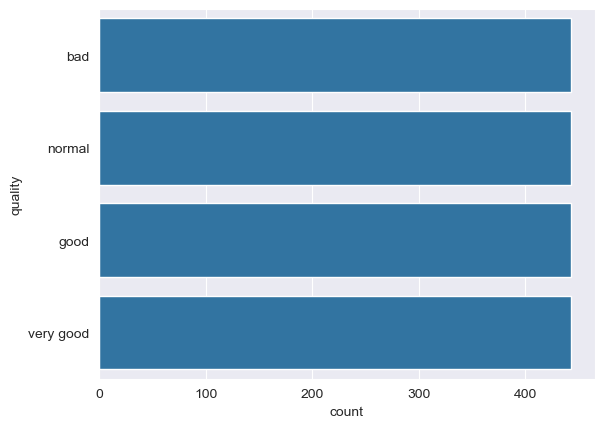

In [78]:
sns.countplot(y_train_resampled)
plt.show()

In [79]:
rf2.fit(X_train_resampled, y_train_resampled)

rf2_pred = rf2.predict(X_valid)

In [80]:
confusion_matrix(y_valid, rf2_pred)

array([[  3,   3,   9,   0],
       [  3, 133,  40,  21],
       [  8,  57, 167,   6],
       [  0,  32,   4,  42]], dtype=int64)

In [81]:
rf2_report = classification_report(y_valid, rf2_pred, output_dict=True)

df_rf2_report = pd.DataFrame(rf2_report).transpose()
df_rf2_report

,precision,recall,f1-score,support
bad,0.214286,0.200000,0.206897,15.000000
good,0.591111,0.675127,0.630332,197.000000
normal,0.759091,0.701681,0.729258,238.000000
very good,0.608696,0.538462,0.571429,78.000000
accuracy,0.653409,0.653409,0.653409,0.653409
macro avg,0.543296,0.528817,0.534479,528.000000
weighted avg,0.658722,0.653409,0.654192,528.000000


Usando otro algoritmo de oversampling llamado SMOTE:

In [82]:
sm = SMOTE(random_state=42, k_neighbors=8)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

In [83]:
y_train_res.value_counts()

quality
bad          443
normal       443
good         443
very good    443
Name: count, dtype: int64

In [84]:
rf2.fit(X_train_res, y_train_res)

rf2_pred = rf2.predict(X_valid)

In [85]:
confusion_matrix(y_valid, rf2_pred)

array([[  6,   2,   7,   0],
       [  7, 116,  42,  32],
       [ 13,  59, 161,   5],
       [  1,  26,   3,  48]], dtype=int64)

In [86]:
rf2_report = classification_report(y_valid, rf2_pred, output_dict=True)

df_rf2_report = pd.DataFrame(rf2_report).transpose()
df_rf2_report

,precision,recall,f1-score,support
bad,0.222222,0.400000,0.285714,15.000000
good,0.571429,0.588832,0.580000,197.000000
normal,0.755869,0.676471,0.713969,238.000000
very good,0.564706,0.615385,0.588957,78.000000
accuracy,0.626894,0.626894,0.626894,0.626894
macro avg,0.528556,0.570172,0.542160,528.000000
weighted avg,0.643653,0.626894,0.633350,528.000000


No somos capaces de ver una mejora sustancial. Pasamos a hacer ingeniería de varibales con el target, convirtiéndolo a variable binaria.

## Regresión logística

In [87]:
data = pd.read_csv('winequality-red.csv')
data['quality'] = data.quality.apply(lambda x: 1 if x > 5 else 0)
data['quality'].head()

0    0
1    0
2    0
3    1
4    0
Name: quality, dtype: int64

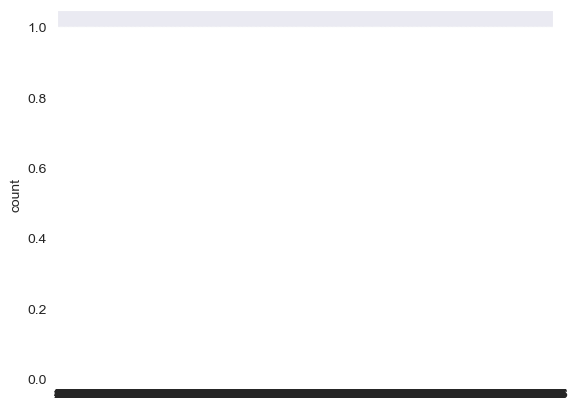

In [88]:
sns.countplot(data['quality'])
plt.show()

In [89]:
y = data['quality']
X = data.drop('quality', axis=1)
X_train, X_valid, y_train, y_valid = train_test_split(X, y)
logit = LogisticRegression()
logit.fit(X_train, y_train)

logit_pred = logit.predict(X_valid)
confusion_matrix(y_valid, logit_pred)

C:\Users\JOSE LUIS\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([[121,  57],
       [ 55, 167]], dtype=int64)

In [90]:
logit_report = classification_report(y_valid, logit_pred, output_dict=True)

df_logit_report = pd.DataFrame(logit_report).transpose()
df_logit_report

,precision,recall,f1-score,support
0,0.687500,0.679775,0.683616,178.00
1,0.745536,0.752252,0.748879,222.00
accuracy,0.720000,0.720000,0.720000,0.72
macro avg,0.716518,0.716014,0.716247,400.00
weighted avg,0.719710,0.720000,0.719837,400.00


In [91]:
roc_auc_score(y_valid, logit_pred)

0.7160137665755644

## Ingeniería de variables

Incluyo nuevamente la variable de grados de alcohol elevados al cuadrado, para que ayude al modelo a discriminar mejor entre las categorías.

In [92]:
data['alcohol squared'] = data.alcohol ** 2
y = data.quality
X = data.drop('quality', axis=1)
X_train, X_valid, y_train, y_valid = train_test_split(X, y)
logit2 = LogisticRegression()
logit2.fit(X_train, y_train)

logit2_pred = logit2.predict(X_valid)
confusion_matrix(y_valid, logit2_pred)

C:\Users\JOSE LUIS\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([[127,  52],
       [ 64, 157]], dtype=int64)

In [93]:
logit2_report = classification_report(y_valid, logit2_pred, output_dict=True)

df_logit2_report = pd.DataFrame(logit2_report).transpose()
df_logit2_report

,precision,recall,f1-score,support
0,0.664921,0.709497,0.686486,179.00
1,0.751196,0.710407,0.730233,221.00
accuracy,0.710000,0.710000,0.710000,0.71
macro avg,0.708059,0.709952,0.708360,400.00
weighted avg,0.712588,0.710000,0.710656,400.00


In [94]:
roc_auc_score(y_valid, logit2_pred)

0.7099522232614576

In [105]:
predictors_col = ["alcohol", "quality", "sulphates"]
target_col = ['sulphates']

In [106]:
predictors = data[predictors_col]
target = data[target_col]

In [107]:
predictors

,alcohol,quality,sulphates
0,9.4,0,0.56
1,9.8,0,0.68
2,9.8,0,0.65
3,9.8,1,0.58
4,9.4,0,0.56
...,...,...,...
1594,10.5,0,0.58
1595,11.2,1,0.76
1596,11.0,1,0.75
1597,10.2,0,0.71


In [108]:
target

,sulphates
0,0.56
1,0.68
2,0.65
3,0.58
4,0.56
...,...
1594,0.58
1595,0.76
1596,0.75
1597,0.71


In [109]:
corr = predictors.corr()
corr

,alcohol,quality,sulphates
alcohol,1.000000,0.434751,0.093595
quality,0.434751,1.000000,0.218072
sulphates,0.093595,0.218072,1.000000


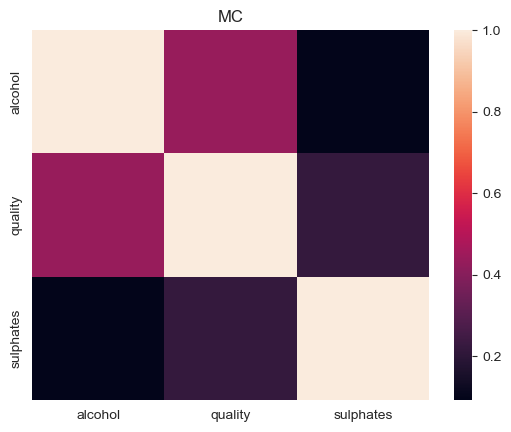

In [122]:
sns.heatmap(corr)
plt.title('MC')
plt.show()

In [101]:
tree = DecisionTreeClassifier()

In [102]:
arbol = tree.fit(X_train, y_train)

[Text(0.6678344544095666, 0.975, 'x[10] <= 10.525\ngini = 0.498\nsamples = 1199\nvalue = [565, 634]'),
 Text(0.42077727952167415, 0.925, 'x[1] <= 0.548\ngini = 0.462\nsamples = 734\nvalue = [468, 266]'),
 Text(0.2739162929745889, 0.875, 'x[9] <= 0.645\ngini = 0.5\nsamples = 357\nvalue = [182, 175]'),
 Text(0.17862481315396114, 0.825, 'x[11] <= 97.025\ngini = 0.46\nsamples = 215\nvalue = [138, 77]'),
 Text(0.11434977578475336, 0.775, 'x[6] <= 71.0\ngini = 0.391\nsamples = 154\nvalue = [113, 41]'),
 Text(0.061285500747384154, 0.725, 'x[9] <= 0.585\ngini = 0.452\nsamples = 107\nvalue = [70, 37]'),
 Text(0.02391629297458894, 0.675, 'x[6] <= 29.5\ngini = 0.324\nsamples = 59\nvalue = [47, 12]'),
 Text(0.017937219730941704, 0.625, 'gini = 0.0\nsamples = 21\nvalue = [21, 0]'),
 Text(0.029895366218236172, 0.625, 'x[7] <= 0.996\ngini = 0.432\nsamples = 38\nvalue = [26, 12]'),
 Text(0.02391629297458894, 0.575, 'gini = 0.0\nsamples = 8\nvalue = [8, 0]'),
 Text(0.03587443946188341, 0.575, 'x[4] <= 

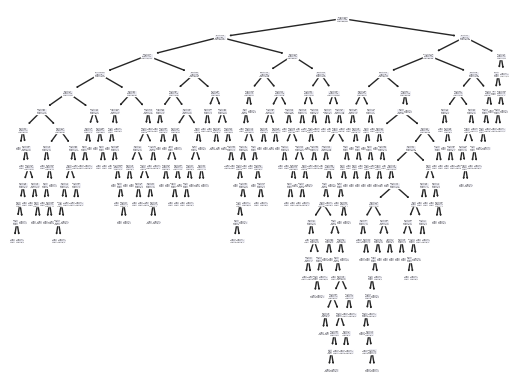

In [103]:
plot_tree(arbol)